<a href="https://colab.research.google.com/github/georgeboorman/NBA-Projects/blob/main/Analysing_NBA_Player_Performance_between_1970_and_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Analysing NBA Player Performance between 1970 and 2020**

This notebook aims to gather and review data relating to [NBA](www.nba.com) players across seasons from 1970 to 2020. It will form part of a series of notebooks covering exploratory data analysis, hypothesis testing and machine learning. 

This notebook covers:

* Data Gathering
* Data Wrangling
* Exploratory Data Analysis
* Hypothesis Testing
* Next Steps

Specifically for the Hypothesis Testing section, analyses will be undertaken in an attempt to answer the following questions:

1.  Is there a significant positive correlation between a) points and assists, b) points and rebounds, or a negative correlation between c) rebounds and assists? 
2.  Are NBA players better 3 point shooters now (2010-2019) vs other decades? 

We will answer other questions, and build machine learning models, in other notebooks using the same data acquired below. 

## Data Gathering

Data will be collected from [Basketball Reference](https://www.basketball-reference.com) detailing player per game statistics for all seasons from 1970 to 2020.

This data will be aggregated into a single dataframe and features converted into appropriate data types for analysis. 



In [ ]:
# Import required libraries

from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time

In [ ]:
# List of seasons we want to extract
years = list(np.arange(1970, 2020))

# Creating a dictionary to store the scraped data per season
seasons_dict = {}

In [ ]:
# Extracting and converting to dataframe using pd.read_html

for year in years: 
  # Loop through URLs and scrape data
  url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year)
  data = pd.read_html(url)

  # Remov first element from list (avoids storing each cell as a list)
  data = data.pop(0)
  
  # Add a column for season
  data['Season'] = year

  # Add to the dictionary
  seasons_dict[year] = data

  # Wait to run next query
  time.sleep(1)

In [ ]:
# Checking all seasons are in the dictionary
print(seasons_dict.keys())

dict_keys([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])


In [ ]:
# Combining into a single dataframe
df = pd.concat(seasons_dict.values())

In [ ]:
# Inspecting the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24071 entries, 0 to 733
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      24071 non-null  object
 1   Player  24071 non-null  object
 2   Pos     24071 non-null  object
 3   Age     24071 non-null  object
 4   Tm      24071 non-null  object
 5   G       24071 non-null  object
 6   GS      20574 non-null  object
 7   MP      24071 non-null  object
 8   FG      24071 non-null  object
 9   FGA     24071 non-null  object
 10  FG%     23963 non-null  object
 11  3P      21221 non-null  object
 12  3PA     21221 non-null  object
 13  3P%     17598 non-null  object
 14  2P      24071 non-null  object
 15  2PA     24071 non-null  object
 16  2P%     23911 non-null  object
 17  eFG%    23963 non-null  object
 18  FT      24071 non-null  object
 19  FTA     24071 non-null  object
 20  FT%     23158 non-null  object
 21  ORB     23091 non-null  object
 22  DRB     23091 non-null  

In [ ]:
# Saving file locally
from google.colab import files
df.to_excel('nba_players.xlsx')
files.download('nba_players.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Viewing frequency of players by season
print(df['Season'].value_counts(ascending=False)

2019    708
2018    664
2015    651
2011    625
2014    611
2008    595
2017    595
2004    585
2005    585
2009    582
2016    578
2010    578
1997    574
2013    573
2006    563
2012    551
1998    547
1996    545
2001    537
2007    516
1999    507
2002    500
2000    496
2003    483
1994    481
1990    459
1992    458
1995    452
1993    449
1991    441
1989    438
1988    426
1983    391
1986    379
1987    378
1978    374
1982    373
1981    363
1985    362
1977    357
1980    357
1979    344
1984    343
1975    276
1976    274
1973    269
1972    265
1971    245
1974    245
1970    201
Name: Season, dtype: int64


In [ ]:
# Checking data for all seasons exists in the dataframe, using LeBron James as a test
df[df['Player'] == 'LeBron James']

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
13845,266,203,LeBron James,SG,19,CLE,79,79.0,39.5,7.9,18.9,0.417,0.8,2.7,0.290,7.1,16.1,0.438,0.438,4.4,5.8,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,2004
14442,278,215,LeBron James,SF,20,CLE,80,80.0,42.4,9.9,21.1,0.472,1.4,3.9,0.351,8.6,17.2,0.499,0.504,6.0,8.0,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,2005
15015,266,207,LeBron James,SF,21,CLE,79,79.0,42.5,11.1,23.1,0.480,1.6,4.8,0.335,9.5,18.3,0.518,0.515,7.6,10.3,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4,2006
15556,244,207,LeBron James,SF,22,CLE,78,78.0,40.9,9.9,20.8,0.476,1.3,4.0,0.319,8.6,16.8,0.513,0.507,6.3,9.0,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3,2007
16112,284,211,LeBron James,SF,23,CLE,75,74.0,40.4,10.6,21.9,0.484,1.5,4.8,0.315,9.1,17.1,0.531,0.518,7.3,10.3,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0,2008
16705,282,208,LeBron James,SF,24,CLE,81,81.0,37.7,9.7,19.9,0.489,1.6,4.7,0.344,8.1,15.2,0.535,0.530,7.3,9.4,0.780,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4,2009
17300,296,222,LeBron James,SF,25,CLE,76,76.0,39.0,10.1,20.1,0.503,1.7,5.1,0.333,8.4,15.0,0.560,0.545,7.8,10.2,0.767,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7,2010
17904,322,226,LeBron James,SF,26,MIA,79,79.0,38.8,9.6,18.8,0.510,1.2,3.5,0.330,8.4,15.3,0.552,0.541,6.4,8.4,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7,2011
18486,279,233,LeBron James,SF,27,MIA,62,62.0,37.5,10.0,18.9,0.531,0.9,2.4,0.362,9.1,16.5,0.556,0.554,6.2,8.1,0.771,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1,2012
19023,264,212,LeBron James,PF,28,MIA,76,76.0,37.9,10.1,17.8,0.565,1.4,3.3,0.406,8.7,14.5,0.602,0.603,5.3,7.0,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8,2013


In [ ]:
# List of numeric colums to pass to the apply function
numeric_cols = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Season']

In [ ]:
# Converting relevant columns from string to numeric
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Checking new data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23149 entries, 0 to 23148
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23149 non-null  int64  
 1   Rk          23149 non-null  int64  
 2   Player      23149 non-null  object 
 3   Pos         23149 non-null  object 
 4   Age         23149 non-null  int64  
 5   Tm          23149 non-null  object 
 6   G           23149 non-null  int64  
 7   GS          19652 non-null  float64
 8   MP          23149 non-null  float64
 9   FG          23149 non-null  float64
 10  FGA         23149 non-null  float64
 11  FG%         23041 non-null  float64
 12  3P          20299 non-null  float64
 13  3PA         20299 non-null  float64
 14  3P%         16676 non-null  float64
 15  2P          23149 non-null  float64
 16  2PA         23149 non-null  float64
 17  2P%         22989 non-null  float64
 18  eFG%        23041 non-null  float64
 19  FT          23149 non-nul

## Data Wrangling

Now the data has been sourced let's review it and clean ready for analysis. Here we want to:

- Create appropriate features from the data, for example per game statistics for points, assists, rebounds, steals, blocks, and turnovers
- Add a column for assist to turnover ratio
- Build columns showing per minute contributions for points, assists, steals and blocks, to see which players have the most impact in shorter periods

In [ ]:
# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
# Reviewing columns
df.columns

Index(['Unnamed: 0', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Season'],
      dtype='object')

In [ ]:
# Removing unnamed column, and basketball reference rank
df.drop(columns=['Unnamed: 0', 'Rk'], inplace=True)
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Season'],
      dtype='object')

In [ ]:
# Viewing null values
df.isnull().sum()

Player       0
Pos          0
Age          0
Tm           0
G            0
GS        3497
MP           0
FG           0
FGA          0
FG%        108
3P        2850
3PA       2850
3P%       6473
2P           0
2PA          0
2P%        160
eFG%       108
FT           0
FTA          0
FT%        913
ORB        980
DRB        980
TRB          0
AST          0
STL        980
BLK        980
TOV       2132
PF           0
PTS          0
Season       0
dtype: int64

We can see quite a lot of missing values, some of these might be caused by changes in the NBA rules or a statistic not being recorded until part-way into our dataset. 

For instance, the [3 point shot](https://en.wikipedia.org/wiki/Three-point_field_goal) wasn't introduced until the 1979-80 season. [Steals](https://en.wikipedia.org/wiki/Steal_(basketball) and blocks were not recorded until 1973, whilst turnovers did not get recorded until 1977. 

Let's look further into the data to confirm when the above statistics began to be collected. 

In [ ]:
# Checking the year where the above mentioned statistics were recorded
df[df['Season'] <= 1985].groupby('Season')[['3P', 'STL', 'BLK', 'TOV']].sum()

,3P,STL,BLK,TOV
Season,,,,
1970,0.0,0.0,0.0,0.0
1971,0.0,0.0,0.0,0.0
1972,0.0,0.0,0.0,0.0
1973,0.0,0.0,0.0,0.0
1974,0.0,188.8,101.9,0.0
1975,0.0,219.2,102.8,0.0
1976,0.0,207.1,103.6,0.0
1977,0.0,279.1,161.6,0.0
1978,0.0,307.7,162.1,656.5


In [ ]:
# Viewing which rows have missing values for FG%
print(df[df['FG%'].isna()])

               Player Pos  Age   Tm  G   GS  ...  STL  BLK  TOV   PF  PTS  Season
290       Matt Guokas  SG   26  PHI  1  NaN  ...  NaN  NaN  NaN  0.0  0.0    1971
528    Shaler Halimon  SF   26  ATL  1  NaN  ...  NaN  NaN  NaN  1.0  0.0    1972
741       Roger Brown   C   22  LAL  1  NaN  ...  NaN  NaN  NaN  1.0  1.0    1973
892    Luther Rackley   C   26  NYK  1  NaN  ...  NaN  NaN  NaN  2.0  0.0    1973
1153     Mike Ratliff   C   22  KCO  2  NaN  ...  0.0  0.0  NaN  0.0  0.0    1974
...               ...  ..  ...  ... ..  ...  ...  ...  ...  ...  ...  ...     ...
22811     George King  SF   25  PHO  1  0.0  ...  0.0  0.0  0.0  0.0  0.0    2019
22919   Eric Moreland  PF   27  PHO  1  0.0  ...  0.0  0.0  0.0  1.0  0.0    2019
23044    Kobi Simmons  PG   21  CLE  1  0.0  ...  0.0  0.0  0.0  0.0  0.0    2019
23059    Ray Spalding  PF   21  DAL  1  0.0  ...  0.0  0.0  0.0  0.0  0.0    2019
23096      Tyler Ulis  PG   23  CHI  1  0.0  ...  0.0  0.0  0.0  0.0  0.0    2019

[108 rows x 30 

The players with no FG% recorded are across multiple seasons. Let's find the maximum amount of time they played.

In [ ]:
print(df.groupby('FG%')['MP'].agg(['min', 'mean', 'max', 'std']))

       min      mean   max       std
FG%                                 
0.000  0.7  4.615825  27.0  3.294526
0.056  2.8  2.800000   2.8       NaN
0.063  6.8  6.800000   6.8       NaN
0.071  5.8  5.800000   5.8       NaN
0.077  5.4  5.400000   5.4       NaN
...    ...       ...   ...       ...
0.769  5.8  5.800000   5.8       NaN
0.778  9.5  9.500000   9.5       NaN
0.800  1.8  6.118182  14.0  4.499293
0.857  4.1  7.700000  11.3  5.091169
1.000  0.7  4.719277  19.0  3.858391

[500 rows x 4 columns]


In [ ]:
# Viewing the distribution of Field Goal % by Minutes Played
fig = px.scatter(df, x='FG%', y='MP', title='Field Goal % by Minutes Played')
fig.show()

In [ ]:
# One person played 27 minutes per game with a FG% of 0, let's look at this individual
df[(df['FG%'] == 0) & (df['MP'] == 27.0)]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
7021,Jerry Sichting,PG,33,MIL,1,0.0,27.0,0.0,6.0,0.0,0.0,0.0,NaN,0.0,6.0,0.0,0.0,3.0,4.0,0.75,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,1990


In [ ]:
# Finding out more about Jerry Sichting
df[df['Player'] == 'Jerry Sichting']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
3512,Jerry Sichting,PG,24,IND,47,NaN,9.6,0.7,2.0,0.358,0.0,0.1,0.000,0.7,1.9,0.378,0.358,0.5,0.7,0.781,0.2,0.7,0.9,1.5,0.5,0.0,0.6,0.8,2.0,1981
3871,Jerry Sichting,PG,25,IND,51,0.0,15.7,1.8,3.8,0.469,0.0,0.2,0.111,1.8,3.6,0.486,0.472,0.6,0.7,0.763,0.3,0.8,1.1,2.3,0.6,0.0,0.8,1.2,4.2,1982
4251,Jerry Sichting,PG,26,IND,78,58.0,31.2,4.1,8.5,0.478,0.0,0.2,0.167,4.0,8.2,0.487,0.480,1.2,1.4,0.860,0.4,1.6,2.0,5.6,1.3,0.0,1.8,2.4,9.3,1983
4600,Jerry Sichting,PG,27,IND,80,80.0,31.2,5.0,9.3,0.532,0.1,0.3,0.300,4.9,9.1,0.539,0.536,1.5,1.7,0.867,0.6,1.6,2.1,5.7,1.1,0.1,1.8,2.2,11.5,1984
4950,Jerry Sichting,PG,28,IND,70,25.0,25.8,4.6,8.9,0.521,0.1,0.5,0.243,4.5,8.4,0.538,0.528,1.6,1.8,0.875,0.3,1.3,1.6,3.8,0.7,0.1,1.5,1.7,11.0,1985
5324,Jerry Sichting,PG,29,BOS,82,7.0,19.5,2.9,5.0,0.570,0.1,0.2,0.375,2.8,4.8,0.578,0.578,0.7,0.8,0.924,0.3,0.9,1.3,2.3,0.6,0.0,0.9,1.4,6.5,1986
5704,Jerry Sichting,PG,30,BOS,78,15.0,20.1,2.6,5.1,0.508,0.1,0.3,0.269,2.5,4.8,0.524,0.516,0.5,0.5,0.881,0.3,0.9,1.2,2.4,0.5,0.0,0.8,1.6,5.7,1987
6117,Jerry Sichting,PG,31,TOT,52,1.0,13.3,1.8,3.3,0.541,0.2,0.4,0.455,1.6,2.9,0.553,0.570,0.3,0.4,0.739,0.2,0.5,0.7,1.8,0.4,0.0,0.4,1.2,4.1,1988
6118,Jerry Sichting,PG,31,BOS,24,1.0,15.4,1.8,3.4,0.537,0.1,0.3,0.250,1.8,3.1,0.568,0.549,0.3,0.5,0.667,0.2,0.7,0.9,2.5,0.6,0.0,0.6,1.3,4.1,1988
6119,Jerry Sichting,PG,31,POR,28,0.0,11.6,1.8,3.2,0.544,0.3,0.5,0.571,1.5,2.7,0.539,0.589,0.3,0.4,0.818,0.1,0.4,0.5,1.2,0.3,0.0,0.3,1.1,4.1,1988


We can see that in 1990 [Jerry Sichting](https://en.wikipedia.org/wiki/Jerry_Sichting) averaged 27 minutes per game with the Milwaukee Bucks, with a Field Goal Percentage of zero. The reason was that he only played one game with them. 

We can also  see that in some seasons Jerry played for multiple teams. Therefore it might be useful to aggregate player data to only have 1 row per player per season. To do this we need to:

- Create new columns showing the totals per statistic rather than per-game averages
- Group by player by season to give their overall numbers for each given year

In [ ]:
# Function to create total stats columns
def total_stats(df, col):
  # Multiply games column by the stat column specified in the function
  df['total_'+col] = round(df['G'] * df[col])

In [ ]:
# Testing for one column (points)
total_stats(df, 'PTS')
print(df.head())

                 Player Pos  Age   Tm   G  ...  TOV   PF   PTS  Season  total_PTS
0       Zaid Abdul-Aziz  PF   23  MIL  80  ...  NaN  2.1   7.4    1970      592.0
1  Kareem Abdul-Jabbar*   C   22  MIL  82  ...  NaN  3.5  28.8    1970     2361.6
2          Rick Adelman  PG   23  SDR  35  ...  NaN  2.6   7.4    1970      259.0
3          Lucius Allen  PG   22  SEA  81  ...  NaN  2.5   9.8    1970      793.8
4      Wally Anderzunas  SF   24  CIN  44  ...  NaN  1.1   3.6    1970      158.4

[5 rows x 31 columns]


In [ ]:
# Adding total columns for all stats
for stat in ['AST', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF']:
  total_stats(df, stat)

In [ ]:
# Checking the output of the above cell
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,total_PTS,total_AST,total_2P,total_2PA,total_3P,total_3PA,total_FT,total_FTA,total_ORB,total_DRB,total_TRB,total_STL,total_BLK,total_TOV,total_PF
0,Zaid Abdul-Aziz,PF,23,MIL,80,NaN,20.5,3.0,6.8,0.434,NaN,NaN,NaN,3.0,6.8,0.434,0.434,1.5,2.3,0.643,NaN,NaN,7.5,0.8,NaN,NaN,NaN,2.1,7.4,1970,592.0,64.0,240.0,544.0,NaN,NaN,120.0,184.0,NaN,NaN,600.0,NaN,NaN,NaN,168.0
1,Kareem Abdul-Jabbar*,C,22,MIL,82,NaN,43.1,11.4,22.1,0.518,NaN,NaN,NaN,11.4,22.1,0.518,0.518,5.9,9.1,0.653,NaN,NaN,14.5,4.1,NaN,NaN,NaN,3.5,28.8,1970,2361.6,336.2,934.8,1812.2,NaN,NaN,483.8,746.2,NaN,NaN,1189.0,NaN,NaN,NaN,287.0
2,Rick Adelman,PG,23,SDR,35,NaN,20.5,2.7,7.1,0.389,NaN,NaN,NaN,2.7,7.1,0.389,0.389,1.9,2.6,0.747,NaN,NaN,2.3,3.2,NaN,NaN,NaN,2.6,7.4,1970,259.0,112.0,94.5,248.5,NaN,NaN,66.5,91.0,NaN,NaN,80.5,NaN,NaN,NaN,91.0
3,Lucius Allen,PG,22,SEA,81,NaN,22.4,3.8,8.5,0.442,NaN,NaN,NaN,3.8,8.5,0.442,0.442,2.2,3.1,0.731,NaN,NaN,2.6,4.2,NaN,NaN,NaN,2.5,9.8,1970,793.8,340.2,307.8,688.5,NaN,NaN,178.2,251.1,NaN,NaN,210.6,NaN,NaN,NaN,202.5
4,Wally Anderzunas,SF,24,CIN,44,NaN,8.4,1.5,3.8,0.392,NaN,NaN,NaN,1.5,3.8,0.392,0.392,0.7,1.0,0.630,NaN,NaN,1.9,0.2,NaN,NaN,NaN,1.1,3.6,1970,158.4,8.8,66.0,167.2,NaN,NaN,30.8,44.0,NaN,NaN,83.6,NaN,NaN,NaN,48.4


In [ ]:
# Adding total field goals made and attempted
for stat in ['FG', 'FGA']:
  total_stats(df, stat)

In [ ]:
# Adding total minutes played
total_stats(df, 'MP')

In [ ]:
# Delete before publishing
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/NBA Project/nba_players.xlsx')

In [ ]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Season',
       'total_PTS', 'total_AST', 'total_2P', 'total_2PA', 'total_3P',
       'total_3PA', 'total_FT', 'total_FTA', 'total_ORB', 'total_DRB',
       'total_TRB', 'total_STL', 'total_BLK', 'total_TOV', 'total_PF',
       'total_FG', 'total_FGA'],
      dtype='object')

In [ ]:
# List containing columns for the grouped dataframe
groupby_cols = ['G', 'total_MP', 'total_PTS', 'total_AST', 'total_2P', 'total_2PA', 'total_3P',
       'total_3PA', 'total_FT', 'total_FTA', 'total_ORB', 'total_DRB',
       'total_TRB', 'total_STL', 'total_BLK', 'total_TOV', 'total_PF',
       'total_FG', 'total_FGA']

In [ ]:
# Create summarised data for each player per season (as some play for multiple teams in a single season)
grouped = df.groupby(['Season', 'Player', 'Age', 'Pos'])[groupby_cols].sum()

In [ ]:
# Converting into a dataframe with each row containing a single season's data for an individual player
grouped_df = pd.DataFrame(grouped, columns=grouped.columns)
grouped_df.reset_index(inplace=True)
grouped_df.head()

,Season,Player,Age,Pos,G,total_MP,total_PTS,total_AST,total_2P,total_2PA,total_3P,total_3PA,total_FT,total_FTA,total_ORB,total_DRB,total_TRB,total_STL,total_BLK,total_TOV,total_PF,total_FG,total_FGA
0,1970,Adrian Smith,33,SG,154,2174.0,915.1,261.2,309.3,833.0,0.0,0.0,304.2,338.2,0.0,0.0,166.2,0.0,0.0,0.0,248.3,309.0,833.0
1,1970,Al Attles*,33,PG,45,675.0,229.5,144.0,76.5,202.5,0.0,0.0,76.5,112.5,0.0,0.0,72.0,0.0,0.0,0.0,103.5,76.0,202.0
2,1970,Al Hairston,24,SG,3,20.0,6.9,6.0,3.0,8.1,0.0,0.0,0.9,0.9,0.0,0.0,5.1,0.0,0.0,0.0,3.0,3.0,8.0
3,1970,Al Tucker,26,PF,122,1638.0,722.5,74.7,292.5,570.0,0.0,0.0,137.0,173.6,0.0,0.0,330.1,0.0,0.0,0.0,171.8,292.0,570.0
4,1970,Archie Clark,28,PG,76,2774.0,1497.2,380.0,592.8,1200.8,0.0,0.0,311.6,395.2,0.0,0.0,304.0,0.0,0.0,0.0,197.6,593.0,1201.0


In [ ]:
# Testing the above (should only have 1 row for 1990 season now instead of the 3 rows observed in the original dataset)
grouped_df[grouped_df['Player'] == 'Jerry Sichting']

,Season,Player,Age,Pos,G,total_MP,total_PTS,total_AST,total_2P,total_2PA,total_3P,total_3PA,total_FT,total_FTA,total_ORB,total_DRB,total_TRB,total_STL,total_BLK,total_TOV,total_PF,total_FG,total_FGA
2821,1981,Jerry Sichting,24,PG,47,451.0,94.0,70.5,32.9,89.3,0.0,4.7,23.5,32.9,9.4,32.9,42.3,23.5,0.0,28.2,37.6,33.0,94.0
3141,1982,Jerry Sichting,25,PG,51,801.0,214.2,117.3,91.8,183.6,0.0,10.2,30.6,35.7,15.3,40.8,56.1,30.6,0.0,40.8,61.2,92.0,194.0
3461,1983,Jerry Sichting,26,PG,78,2434.0,725.4,436.8,312.0,639.6,0.0,15.6,93.6,109.2,31.2,124.8,156.0,101.4,0.0,140.4,187.2,320.0,663.0
3775,1984,Jerry Sichting,27,PG,80,2496.0,920.0,456.0,392.0,728.0,8.0,24.0,120.0,136.0,48.0,128.0,168.0,88.0,8.0,144.0,176.0,400.0,744.0
4092,1985,Jerry Sichting,28,PG,70,1806.0,770.0,266.0,315.0,588.0,7.0,35.0,112.0,126.0,21.0,91.0,112.0,49.0,7.0,105.0,119.0,322.0,623.0
4421,1986,Jerry Sichting,29,PG,82,1599.0,533.0,188.6,229.6,393.6,8.2,16.4,57.4,65.6,24.6,73.8,106.6,49.2,0.0,73.8,114.8,238.0,410.0
4755,1987,Jerry Sichting,30,PG,78,1568.0,444.6,187.2,195.0,374.4,7.8,23.4,39.0,39.0,23.4,70.2,93.6,39.0,0.0,62.4,124.8,203.0,398.0
5087,1988,Jerry Sichting,31,PG,104,1387.0,426.4,187.2,168.4,300.8,21.2,42.0,31.2,44.0,18.0,54.0,72.0,43.6,0.0,43.6,124.4,187.0,344.0
5435,1989,Jerry Sichting,32,PG,25,390.0,102.5,60.0,42.5,92.5,2.5,12.5,7.5,7.5,10.0,20.0,30.0,15.0,0.0,25.0,17.5,45.0,105.0
5800,1990,Jerry Sichting,33,PG,70,993.0,244.5,188.3,93.1,223.4,6.9,24.1,34.1,42.0,6.9,34.5,37.9,34.5,6.9,41.4,76.9,100.0,251.0


This has worked, but something else stands out - in 1988 Jerry Sichting played 104 games, 22 more than the 82 scheduled for the entire season.

Let's remove any rows where players participated in more than 82 games. 

In [ ]:
# Removing rows containing more than 82 games
grouped_df.drop(grouped_df[grouped_df['G'] > 82].index, inplace=True)
max(grouped_df['G'])

82

In [ ]:
# Confirming nobody played more games than possible in a given year
grouped_df[grouped_df['G'] > 82]

,Season,Player,Age,Pos,G,total_MP,total_PTS,total_AST,total_2P,total_2PA,total_3P,total_3PA,total_FT,total_FTA,total_ORB,total_DRB,total_TRB,total_STL,total_BLK,total_TOV,total_PF,total_FG,total_FGA


In [ ]:
# Adding columns for per game statistics
def per_game_stats(df, col, stat):
  grouped_df['per_game_'+stat] = int(grouped_df[col] / grouped_df['G'], 2)

# Adding columns for per minute contributions
def per_minute_stats(df, col, stat):
  grouped_df['per_minute_'+stat] = int(grouped_df[col] / grouped_df['total_MP'], 2)

In [ ]:
# List of columns from the grouped dataframe
grouped_numeric_cols = ['total_PTS',
       'total_AST', 'total_2P', 'total_2PA', 'total_3P', 'total_3PA',
       'total_FT', 'total_FTA', 'total_ORB', 'total_DRB', 'total_TRB',
       'total_STL', 'total_BLK', 'total_TOV', 'total_PF']
grouped_stats = ['PTS',
       'AST', '2P', '2PA', '3P', '3PA',
       'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'STL', 'BLK', 'TOV', 'PF']

In [ ]:
# Testing the per_game_stats function
per_game_stats(grouped_df, 'total_PTS', 'PTS')

# Testing the per_minute_stats function
per_minute_stats(grouped_df, 'total_PTS', 'PTS')

In [ ]:
# Revewing the outputs
grouped_df.head()

,Season,Player,Age,Pos,G,total_MP,total_PTS,total_AST,total_2P,total_2PA,total_3P,total_3PA,total_FT,total_FTA,total_ORB,total_DRB,total_TRB,total_STL,total_BLK,total_TOV,total_PF,total_FG,total_FGA,per_game_PTS,per_minute_PTS
1,1970,Al Attles*,33,PG,45,675.0,229.5,144.0,76.5,202.5,0.0,0.0,76.5,112.5,0.0,0.0,72.0,0.0,0.0,0.0,103.5,76.0,202.0,5.1,0.34
2,1970,Al Hairston,24,SG,3,20.0,6.9,6.0,3.0,8.1,0.0,0.0,0.9,0.9,0.0,0.0,5.1,0.0,0.0,0.0,3.0,3.0,8.0,2.3,0.34
4,1970,Archie Clark,28,PG,76,2774.0,1497.2,380.0,592.8,1200.8,0.0,0.0,311.6,395.2,0.0,0.0,304.0,0.0,0.0,0.0,197.6,593.0,1201.0,19.7,0.54
6,1970,Art Williams,30,PG,80,1544.0,464.0,504.0,192.0,464.0,0.0,0.0,88.0,120.0,0.0,0.0,296.0,0.0,0.0,0.0,168.0,192.0,464.0,5.8,0.30
7,1970,Bailey Howell*,33,PF,82,2075.0,1033.2,123.0,401.8,934.8,0.0,0.0,237.8,311.6,0.0,0.0,549.4,0.0,0.0,0.0,262.4,402.0,935.0,12.6,0.50


In [ ]:
# Looping through remaining numeric columns
for col in grouped_numeric_cols[1:]:
  for stat in grouped_stats[1:]:
    per_game_stats(grouped_df, col, stat)
    per_minute_stats(grouped_df, col, stat)

The dataframe now contains columns showing total, per game and per minute contributions for each player by season for:

Points, Assists, Steals, Blocks, Total Rebounds, Defensive Rebounds, Offensive Rebounds, Turnovers and Player Fouls.

The last columns to add are: 

- Assist to turnover ratio, which is regularly used as a metric for efficiency in particular amongst Point Guards. 
- Total Minutes Player

In [ ]:
# Adding column for assist to turnover ratio
grouped_df['AST_to_TOV'] = round(grouped_df['total_AST'] / grouped_df['total_TOV'], 2)

# Rounding total columns
grouped_df[grouped_numeric_cols] = grouped_df[grouped_numeric_cols].round()

In [ ]:
# Inserting field goal percentages back into the dataframe
grouped_df['FG%'] = round(grouped_df['total_FG'] / grouped_df['total_FGA'], 2)
grouped_df['2P_FG%'] = round(grouped_df['total_2P'] / grouped_df['total_2PA'], 2)
grouped_df['3P_FG%'] = round(grouped_df['total_3P'] / grouped_df['total_3PA'], 2)

In [ ]:
# Reviewing the updated dataframe
grouped_df.head()

,Season,Player,Age,Pos,G,total_MP,total_PTS,total_AST,total_2P,total_2PA,total_3P,total_3PA,total_FT,total_FTA,total_ORB,total_DRB,total_TRB,total_STL,total_BLK,total_TOV,total_PF,total_FG,total_FGA,per_game_PTS,per_minute_PTS,per_game_AST,per_minute_AST,...,per_minute_2PA,per_game_3P,per_minute_3P,per_game_3PA,per_minute_3PA,per_game_FT,per_minute_FT,per_game_FTA,per_minute_FTA,per_game_ORB,per_minute_ORB,per_game_DRB,per_minute_DRB,per_game_TRB,per_minute_TRB,per_game_STL,per_minute_STL,per_game_BLK,per_minute_BLK,per_game_TOV,per_minute_TOV,per_game_PF,per_minute_PF,AST_to_TOV,FG%,2P_FG%,3P_FG%
0,1970,Al Attles*,33,PG,45,675,230.0,144.0,76.0,202.0,0.0,0.0,76.0,112.0,0.0,0.0,72.0,0.0,0.0,0.0,104.0,76,202,5.1,0.34,2.3,0.15,...,0.15,2.3,0.15,2.3,0.15,2.3,0.15,2.3,0.15,2.3,0.15,2.3,0.15,2.3,0.15,2.3,0.15,2.3,0.15,2.3,0.15,2.3,0.15,inf,0.38,0.38,NaN
1,1970,Al Hairston,24,SG,3,20,7.0,6.0,3.0,8.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,3,8,2.3,0.34,1.0,0.15,...,0.15,1.0,0.15,1.0,0.15,1.0,0.15,1.0,0.15,1.0,0.15,1.0,0.15,1.0,0.15,1.0,0.15,1.0,0.15,1.0,0.15,1.0,0.15,inf,0.38,0.38,NaN
2,1970,Archie Clark,28,PG,76,2774,1497.0,380.0,593.0,1201.0,0.0,0.0,312.0,395.0,0.0,0.0,304.0,0.0,0.0,0.0,198.0,593,1201,19.7,0.54,2.6,0.07,...,0.07,2.6,0.07,2.6,0.07,2.6,0.07,2.6,0.07,2.6,0.07,2.6,0.07,2.6,0.07,2.6,0.07,2.6,0.07,2.6,0.07,2.6,0.07,inf,0.49,0.49,NaN
3,1970,Art Williams,30,PG,80,1544,464.0,504.0,192.0,464.0,0.0,0.0,88.0,120.0,0.0,0.0,296.0,0.0,0.0,0.0,168.0,192,464,5.8,0.30,2.1,0.11,...,0.11,2.1,0.11,2.1,0.11,2.1,0.11,2.1,0.11,2.1,0.11,2.1,0.11,2.1,0.11,2.1,0.11,2.1,0.11,2.1,0.11,2.1,0.11,inf,0.41,0.41,NaN
4,1970,Bailey Howell*,33,PF,82,2075,1033.0,123.0,402.0,935.0,0.0,0.0,238.0,312.0,0.0,0.0,549.0,0.0,0.0,0.0,262.0,402,935,12.6,0.50,3.2,0.13,...,0.13,3.2,0.13,3.2,0.13,3.2,0.13,3.2,0.13,3.2,0.13,3.2,0.13,3.2,0.13,3.2,0.13,3.2,0.13,3.2,0.13,3.2,0.13,inf,0.43,0.43,NaN


In [ ]:
# Saving file locally
from google.colab import files
grouped_df.to_excel('nba_players_stats_per_season.xlsx')
files.download('nba_players_stats_per_season.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exploratory Data Analysis

This section will involve [descriptive statistics](https://en.wikipedia.org/wiki/Descriptive_statistics) and visualisations to help understand the distribution of the data. We will also answer questions such as:

- Who are the best scorers, playmakers, rebounders and blockers based on per-minute, per-game, per-season and overall performance?
- Who has the best assist to turnover ratio between 1970 and 2020?

In [ ]:
# Setting view to width of the dataframe
pd.set_option("display.max_columns", grouped_df.shape[1])

# Descriptive statistics for some of the numeric columns
print(grouped_df.iloc[:,:20].describe())

             Season           Age             G      total_MP     total_PTS  \
count  18270.000000  18270.000000  18270.000000  18270.000000  18270.000000   
mean    1998.062835     26.614833     55.168692   1309.910947    559.004433   
std       13.637917      4.010268     25.494724    946.962637    508.877377   
min     1970.000000     18.000000      1.000000      0.000000      0.000000   
25%     1987.000000     23.000000     36.000000    429.000000    135.000000   
50%     1999.000000     26.000000     64.000000   1224.000000    426.000000   
75%     2010.000000     29.000000     78.000000   2092.000000    853.750000   
max     2019.000000     44.000000     82.000000   3698.000000   3042.000000   

          total_AST      total_2P     total_2PA      total_3P     total_3PA  \
count  18270.000000  18270.000000  18270.000000  18270.000000  18270.000000   
mean     126.310673    191.518774    397.598303     22.776574     65.066010   
std      144.347615    183.466022    369.797118    

The descriptive statistics give a glimpse into the distribution of the data as a whole, for example:

- The average player age in the dataset is 26.6 years, and the oldest is 44
- Players complete a mean of 55 games. However there is a large standard deviation, with the majority of players actually participating in 64+ games per season. 

Across the dataset, on average players supposedly take over 17 times as many 2 pointers than 3 pointers per season (398 vs 23 respectively). It is quite likely this is impacted by having several seasons in the dataset where 3 point field goals didn't exist, as well as the more recent [trend towards more 3 point field goal attempts](https://www.sbnation.com/nba/2021/3/10/22323023/nba-three-point-shooting-breaking-point). It would be interesting to see how much this ratio has changed over time amongst different positions as taller players have begun to take more 3 point shots.


In [ ]:
# Descriptive statistics for the remaining of numeric columns
print(grouped_df.iloc[:,20:].describe())

           total_PF      total_FG     total_FGA  per_game_PTS  per_minute_PTS  \
count  18270.000000  18270.000000  18270.000000  18270.000000    18266.000000   
mean     122.583963    214.338150    462.725889      8.570217        0.383273   
std       83.040123    194.105054    404.327199      6.244561        0.141311   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%       49.000000     52.000000    122.000000      3.600000        0.290000   
50%      120.000000    164.000000    364.000000      7.000000        0.380000   
75%      186.000000    328.000000    711.000000     12.300000        0.460000   
max      389.000000   1158.000000   2280.000000     37.100000        3.000000   

       per_game_AST  per_minute_AST   per_game_2P  per_minute_2P  \
count  18270.000000    18266.000000  18270.000000   18266.000000   
mean       1.996139        0.108530      1.996139       0.108530   
std        0.882202        0.051806      0.882202       0.051806  

The above descriptive statistics show that for most of the metrics (except scoring), quantifying on a per minute basis is not particularly useful. 

It is also worth noting that many columns are not normally distributed, with several having maximum values more than 5 standard distributions away from the mean. This can be demonstrated by plotting histograms - we will just do this for the totals columns. 

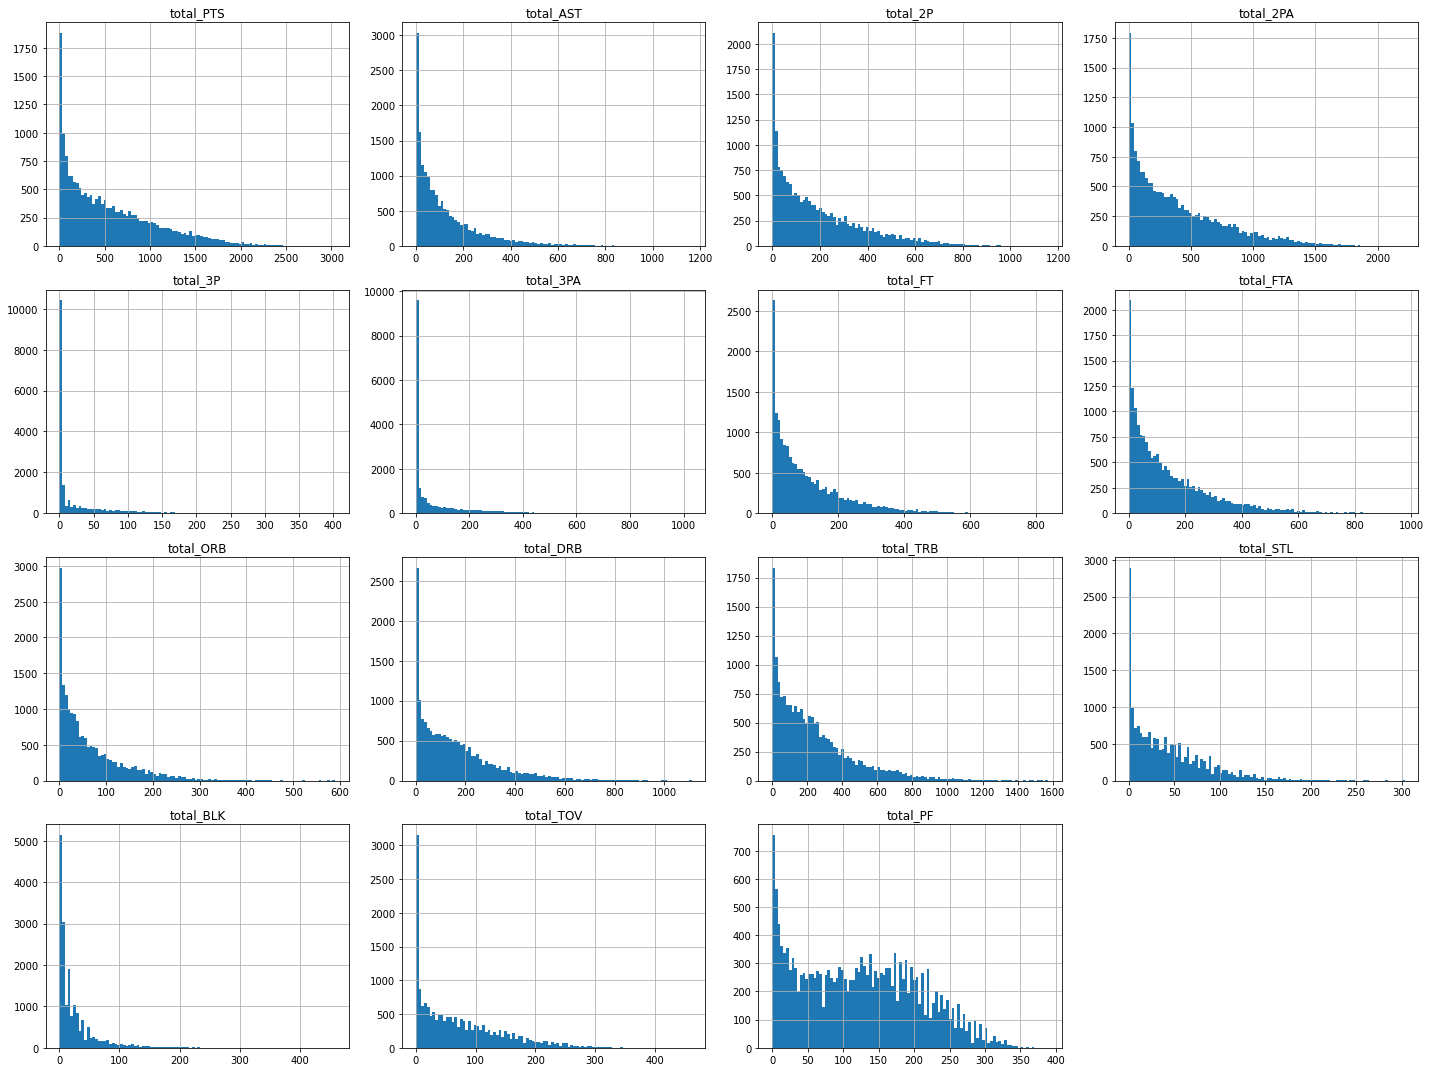

In [ ]:
# Viewing distribution of data
grouped_df[grouped_numeric_cols].hist(bins=100, figsize=(20,15))
plt.tight_layout()
plt.show()

There are certain metrics it would be particularly interesting to examine the relationship between, so we will create some pairplots enabling us to visualise these - `total_PTS`, `total_AST`, `total_TRB`, `total_STL`, `total_MP`. 

<Figure size 432x288 with 0 Axes>

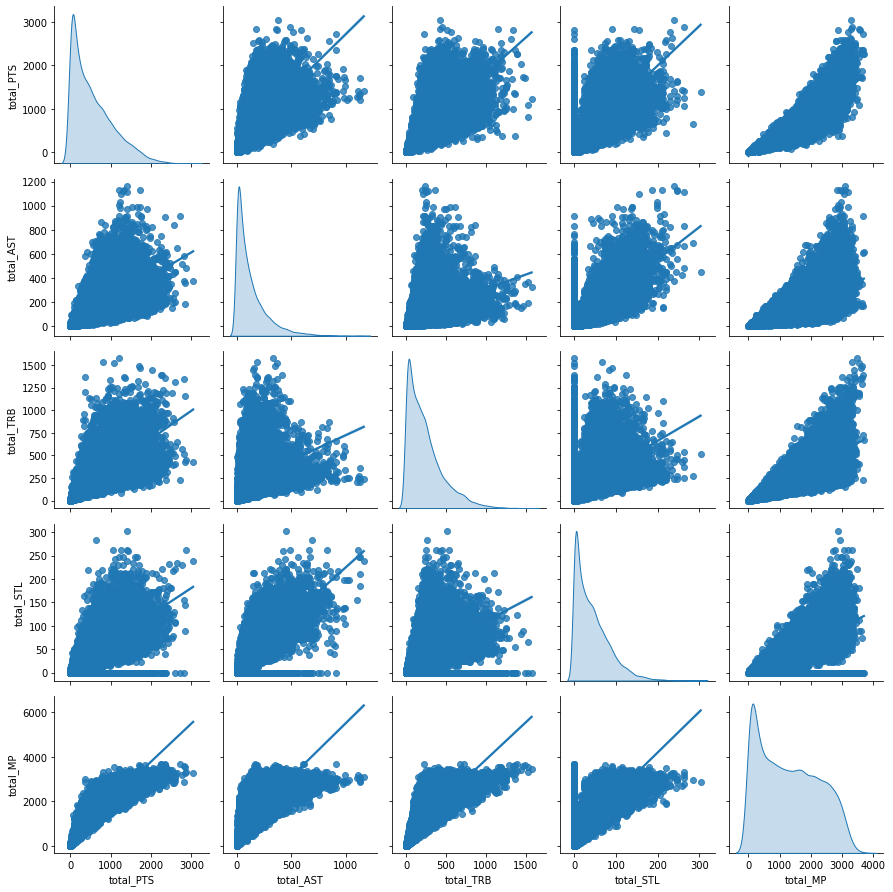

In [ ]:
# Visualising relationship between metrics
cols_of_interest = ['total_PTS', 'total_AST', 'total_TRB', 'total_STL', 'total_MP', ]
fig = plt.figure(figsize=(6,4))
sns.pairplot(grouped_df, vars=cols_of_interest, kind='reg', diag_kind='kde')
plt.tight_layout()
plt.show()

From the pairplot above we can see observe the following:

- All metrics have moderate to strong positive correlation with one another. 
- All data is [right-skewed](https://en.wikipedia.org/wiki/Skewness) to varying degrees, with some level of [kurtosis](https://en.wikipedia.org/wiki/Kurtosis). Most metrics having peak frequencies very close to zero. The main exception is `minutes played` where a larger proportion of the population play between 1000 and 3000 minutes.

Richer insights might be possible by slicing the data to make comparisons of players in the same position versus between positions, or by grouping players based on how many games they start or how many minutes they play per game e.g. Low (0-10), Medium (11-20), High (21-30), Very High (31-40).

For now let's find the best performers across different metrics.

In [ ]:
# Create a list for columns of interest
cols = ['total_PTS', 'per_game_PTS', 'per_minute_PTS', 'total_AST', 'per_game_AST', 'per_minute_AST',
        'total_TRB', 'total_MP', 'per_game_TRB', 'per_minute_TRB', 'total_STL', 'per_game_STL', 'per_minute_STL',
        'total_3P', 'per_game_3P', 'per_minute_3P', 'total_BLK', 'per_game_BLK', 'per_minute_BLK']

# Create list of datapoints for index
index = ['Player', 'Pos', 'Age', 'Season', 
         'total_PTS', 'total_AST', 'total_TRB', 'total_STL', 
         'total_3P', 'total_BLK', 'G', 'total_MP']

# Create dataframes for best and worst seasons
best_performers = pd.DataFrame(columns=cols, index=index)
worst_performers = pd.DataFrame(columns=cols, index=index)

# Loop through the columns to fill the empty dataframes
for col in cols:
  best_performers[col] = grouped_df.iloc[grouped_df[col].idxmax()]
  worst_performers[col] = grouped_df.iloc[grouped_df[col].idxmin()]

In [ ]:
# Who had the best seasons in the last 50 years?
best_performers

,total_PTS,per_game_PTS,per_minute_PTS,total_AST,per_game_AST,per_minute_AST,total_TRB,total_MP,per_game_TRB,per_minute_TRB,total_STL,per_game_STL,per_minute_STL,total_3P,per_game_3P,per_minute_3P,total_BLK,per_game_BLK,per_minute_BLK
Player,Michael Jordan*,Michael Jordan*,Chuck Nevitt,John Stockton*,Robert Smith,Luther Rackley,Wilt Chamberlain*,John Havlicek*,Robert Smith,Luther Rackley,Alvin Robertson,Robert Smith,Luther Rackley,Stephen Curry,Robert Smith,Luther Rackley,Mark Eaton,Robert Smith,Luther Rackley
Pos,SG,SG,C,PG,PG,C,C,SF,PG,C,SG,PG,C,PG,PG,C,C,PG,C
Age,23,23,34,28,25,26,35,31,25,26,23,25,26,27,25,26,28,25,26
Season,1987,1987,1994,1991,1981,1973,1972,1972,1981,1973,1986,1981,1973,2016,1981,1973,1985,1981,1973
total_PTS,3042.2,3042.2,3,1410.4,8,0,1213.6,2255,8,0,1394,8,0,2377.9,8,0,795.4,8,0
total_AST,377.2,377.2,0,1164.4,3,0,328,615,3,0,451,3,0,529.3,3,0,123,3,0
total_TRB,426.4,426.4,1,237.8,3,1,1574.4,672.4,3,1,516.6,3,1,426.6,3,1,926.6,3,1
total_STL,237.8,237.8,0,237.8,0,0,0,0,0,0,303.4,0,0,165.9,0,0,32.8,0,0
total_3P,8.2,8.2,0,57.4,0,0,0,0,0,0,8.2,0,0,402.9,0,0,0,0,0
total_BLK,123,123,0,16.4,0,0,0,0,0,0,41,0,0,15.8,0,0,459.2,0,0


To most NBA fans, the best performers per season overall won't be surprising - Michael Jordan in 1987 for points, John Stockton in 1991 for assists.

The other top performers, as measured per game and per minute, highlight a substantial bias towards making some kind of contribution in a limited number of minutes e.g Luther Rackley with 1 rebound in 2 minutes in 1973.

In [ ]:
worst_performers

,total_PTS,per_game_PTS,per_minute_PTS,total_AST,per_game_AST,per_minute_AST,total_TRB,total_MP,per_game_TRB,per_minute_TRB,total_STL,per_game_STL,per_minute_STL,total_3P,per_game_3P,per_minute_3P,total_BLK,per_game_BLK,per_minute_BLK
Player,Tom Workman,Tom Workman,Tom Workman,Dave Scholz,Dave Scholz,Dave Scholz,Dave Scholz,Alex Scales,Dave Scholz,Dave Scholz,Al Attles*,Dave Scholz,Dave Scholz,Al Attles*,Dave Scholz,Dave Scholz,Al Attles*,Dave Scholz,Dave Scholz
Pos,F-C,F-C,F-C,F,F,F,F,SG,F,F,PG,F,F,PG,F,F,PG,F,F
Age,25,25,25,21,21,21,21,27,21,21,33,21,21,33,21,21,33,21,21
Tm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,1970,1970,1970,1970,1970,1970,1970,2006,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970
total_PTS,0,0,0,2,2,2,2,0,2,2,229.5,2,2,229.5,2,2,229.5,2,2
total_AST,0,0,0,0,0,0,0,0,0,0,144,0,0,144,0,0,144,0,0
total_TRB,0,0,0,0,0,0,0,0,0,0,72,0,0,72,0,0,72,0,0
total_STL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
total_3P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The same bias towards lower minutes played is evident for the worst performers dataframe. 

A better approach would be to set a minimum threshold on minutes played and/or the metric being observed. 

Lastly, let's see which player has the best `Assist to Turnover` ratio in the last 50 years.

In [ ]:
# Removing infinity values for the target column
grouped_df_copy = grouped_df[grouped_df['AST_to_TOV'] != np.inf]

In [ ]:
# Finding the player with the highest Assist to Turnover Ratio
grouped_df_copy[grouped_df_copy['AST_to_TOV'] == grouped_df_copy['AST_to_TOV'].max()]

,Season,Player,Age,Pos,G,total_MP,total_PTS,total_AST,total_2P,total_2PA,total_3P,total_3PA,total_FT,total_FTA,total_ORB,total_DRB,total_TRB,total_STL,total_BLK,total_TOV,total_PF,total_FG,total_FGA,per_game_PTS,per_minute_PTS,per_game_AST,per_minute_AST,per_game_2P,per_minute_2P,per_game_2PA,per_minute_2PA,per_game_3P,per_minute_3P,per_game_3PA,per_minute_3PA,per_game_FT,per_minute_FT,per_game_FTA,per_minute_FTA,per_game_ORB,per_minute_ORB,per_game_DRB,per_minute_DRB,per_game_TRB,per_minute_TRB,per_game_STL,per_minute_STL,per_game_BLK,per_minute_BLK,per_game_TOV,per_minute_TOV,per_game_PF,per_minute_PF,AST_to_TOV,FG%,2P_FG%,3P_FG%
13322,2009,Gilbert Arenas,27,PG,2,63,26,20,4,16,2,7,12,16,1,8,9,0,1,1,4,6,23,13.0,0.41,2.0,0.06,2.0,0.06,2.0,0.06,2.0,0.06,2.0,0.06,2.0,0.06,2.0,0.06,2.0,0.06,2.0,0.06,2.0,0.06,2.0,0.06,2.0,0.06,2.0,0.06,2.0,0.06,20.0,0.26,0.25,0.29


Gilbert Arenas has the best Assist to Turnover ratio from his season in 2008-09, however he only played 63 minutes across 2 games! Let's repeat this with a minimum threshold of 1000 minutes.

In [ ]:
# Filtering the copied dataframe for minumum minutes played
min_1000_mp = grouped_df_copy[grouped_df_copy['total_MP'] >= 1000]

In [ ]:
# Finding max AST_to_TOV from filtered dataframe
min_1000_mp[min_1000_mp['AST_to_TOV'] == min_1000_mp['AST_to_TOV'].max()]

,Season,Player,Age,Pos,G,total_MP,total_PTS,total_AST,total_2P,total_2PA,total_3P,total_3PA,total_FT,total_FTA,total_ORB,total_DRB,total_TRB,total_STL,total_BLK,total_TOV,total_PF,total_FG,total_FGA,per_game_PTS,per_minute_PTS,per_game_AST,per_minute_AST,per_game_2P,per_minute_2P,per_game_2PA,per_minute_2PA,per_game_3P,per_minute_3P,per_game_3PA,per_minute_3PA,per_game_FT,per_minute_FT,per_game_FTA,per_minute_FTA,per_game_ORB,per_minute_ORB,per_game_DRB,per_minute_DRB,per_game_TRB,per_minute_TRB,per_game_STL,per_minute_STL,per_game_BLK,per_minute_BLK,per_game_TOV,per_minute_TOV,per_game_PF,per_minute_PF,AST_to_TOV,FG%,2P_FG%,3P_FG%
18240,2019,Tyus Jones,22,PG,68,1557,469,326,143,320,41,129,61,68,20,109,136,82,7,48,75,184,449,6.9,0.3,1.1,0.05,1.1,0.05,1.1,0.05,1.1,0.05,1.1,0.05,1.1,0.05,1.1,0.05,1.1,0.05,1.1,0.05,1.1,0.05,1.1,0.05,1.1,0.05,1.1,0.05,1.1,0.05,6.79,0.41,0.45,0.32


With this filter applied, the new winner of this accolade is [Tyus Jones](https://en.wikipedia.org/wiki/Tyus_Jones) in his final season with the Minnesota Timberwolves with a `AST_to_TOV` ratio of 6.79! 

In [ ]:
# Saving a local copy
best_performers.to_excel('best_seasons.xlsx')
files.download('best_seasons.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Interestingly there is a large jump around 1976. This is likely a result of a) fewer teams (17 in 1970-71 vs 30 in 2019-20) meaning less games played overall, and b) the introduction of 3 pointers in 1979-80 season. 

Regardless, there is a clear trend towards higher scoring seasons. We can observe drops in the [1998-99](https://en.wikipedia.org/wiki/1998%E2%80%9399_NBA_season) and [2011-12]((https://en.wikipedia.org/wiki/2011_NBA_lockout#:~:text=The%20161%2Dday%20lockout%20began,the%20season%20to%2050%20games.)) season, which are both due to lockouts resulting in less games being played. 

We will re-run this using a different approach:

- Grouping by season and team
- Accounting for the number of teams, and by extension the number of games played

# Hypothesis Testing

Let's move on to answering research questions. This section is focused on hypothesis testing using the dataset through inferential statistics and further visualisation. Specifically, the following questions will be evaluated:

1.  Is there a significant positive correlation between a) points and assists, b) points and rebounds, or a negative correlation between c) rebounds and assists? 
2.  Are NBA players better 3 point shooters now (2011-2020) vs other decades? 

For all statistical tests, we will omit null values. 


### 1. Is there a correlation between points and assists, points and rebounds, or rebounds and assists? Are any of these significant?

Since earlier data explortation highlighted non-normal distributions, we will not be able to use parametric statistical tests such as [Pearson's correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) to answer the above questions. Instead we will use [Spearman's correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

In [ ]:
import statsmodels.api as sm
from scipy import stats

Text(0.5, 1.0, 'Relationship between Points and Assists')

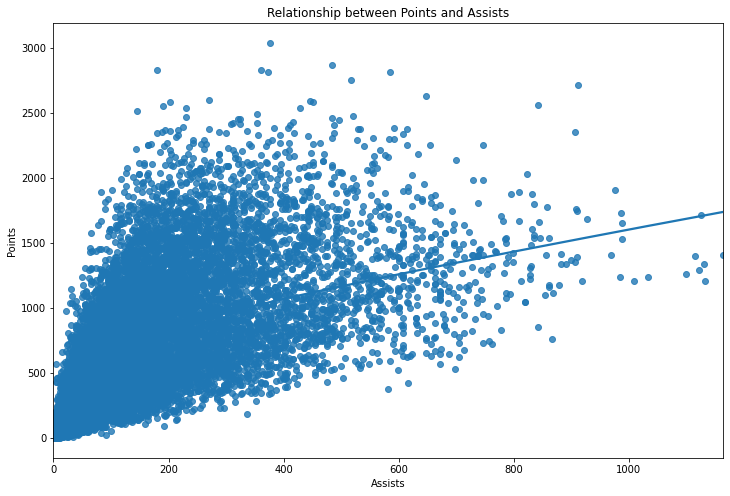

In [ ]:
# Correlation scatterplot for Assists and Points
plt.figure(figsize=(12,8))
sns.regplot(x='total_AST', y='total_PTS', data=grouped_df, lowess=True)
plt.xlabel('Assists')
plt.ylabel('Points')
plt.title('Relationship between Points and Assists')

Visually we can see a strong correlation, and whilst some outliers can be observed they are unlikely to influence the correlation result by much as these are across both:

- Higher assists and lower points, and
- Higher points and lower assists

But is the correlation significant? Let's find out. 

In [ ]:
# Spearman correlation for points and assists
spearman = stats.spearmanr(grouped_df['total_AST'], grouped_df['total_PTS'], nan_policy='omit')
print('Correlation is {:.2f}, Alpha is {}'.format(spearman[0], spearman[1]))

Correlation is 0.87, Alpha is 0.0


Based on an output of 0.87 it would be reasonable to conclude there is a very strong correlation between `points` and `assists`. 

However, we should  be cautious of reading too much into this relationship, as [Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20also%20goes,when%20these%20groups%20are%20combined.) highlights that correlations can be misleading if confounding variables are not considered. A likely candidate we could consider is minutes played - we could explore this through a [Kruskall-Wallis test](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance) which is a non-parametric equivalent to an [Analysis of Variance](https://en.wikipedia.org/wiki/Analysis_of_variance) (ANOVA). 

**What about points and rebounds?**

In [ ]:
# Points and rebounds by position
fig = px.scatter(grouped_df, x='total_TRB', y='total_PTS', color='Pos', 
                 title='Points and Rebounds by Position', trendline='ols', opacity=0.8)
fig.update_layout({'xaxis': {'title': {'text': 'Rebounds'}},
                  'yaxis': {'title': {'text': 'Points'}},
                   'title': {'y':0.9, 'x':0.5}})
fig.show()

Whilst there are different correlation levels by position, all are moderate to strong in the above scatterplot. As might be expected, we can observe a trend towards higher scoring and lower rebounds amongst points guards, and vice versa amongst centers. 

This visualisation could be improved by re-categorising players to one of five [positions](https://en.wikipedia.org/wiki/Basketball_positions). 

Let's look at OLS Regression results for one position, then test significance of the correlation on the dataset as a whole. 

In [ ]:
# Viewing the regression results for PG position
results = px.get_trendline_results(fig)
results.query("Pos == 'PG'").px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     8730.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:11:04   Log-Likelihood:                -23327.
No. Observations:                3352   AIC:                         4.666e+04
Df Residuals:                    3350   BIC:                         4.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.2506      7.040      8.700      0.000      47.447      75.054
x1             3.6310      0.039     93.433      0.000       3.555       3.707
==============================================================================
Omnibus:                      517.817   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4885.217
Skew:                           0.432   Prob(JB):                         0.00
Kurtosis:                       8.851   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above shows:

Strong positive correlation, as denoted by [R-Squared](https://en.wikipedia.org/wiki/Coefficient_of_determination). Adjusted R-Squared is the same value as we only have 1 independent variable. 

`No. Observations` is 3,352 which describes the number of Point Guards in the dataset. [`Skewness`](https://en.wikipedia.org/wiki/Skewness) of 0.4 indicates the data is symmetrical (where 0 = perfectly symmetrical). [`Kurtosis`](https://en.wikipedia.org/wiki/Kurtosis), which is used to quantify tail extremity, is 8.851. For a normal distribution we expect kurtosis to equal 3, meaning this dataset is Leptokurtic (has positive excess kurtosis). Given linear regression assumes normal distribution of our data, we could apply the [Box-Cox transformation](https://en.wikipedia.org/wiki/Power_transform) and then re-plot. 

The predictive value of points based on rebounds for Point Guards is:

x1 (3.6310) *  x (`total_TRB`) + const (61.2506). 

In [ ]:
# Spearman correlation for points and rebounds
spearman2 = stats.spearmanr(grouped_df['total_TRB'], grouped_df['total_PTS'], nan_policy='omit')
print('Correlation is {:.2f}, Alpha is {}'.format(spearman2[0], spearman2[1]))

Correlation is 0.85, Alpha is 0.0


Again the results suggest a strong correlation exists, but as mentioned previously the data should be transformed first before running a correlation test. Further analysis would be required for any reasonable inference on what influences this relationship. Firstly, this looked at overall rebounds where as splitting into defensive vs offensive rebounds might offer better insights. 

If we split types of rebounds up then it may be worth investigating the relationship of offensive rebounds with field goal percentage of teammates, as higher rebounds may suggest either lower field goal percentage or a high volume of field goals attempted - both scenarios would create additional point scoring opportunities. 

For offensive rebounds, if field goal attempts is high and field goal percentage is high we may expect to see a lower correlation between points and rebounds as scoring is high and rebounding opportunities are low. We could expect this to also apply for defensive rebounds and opponents' field goal percentage.

The above analyses are likely more appropriate to be conducted on a team basis rather than for individual players, so we can account for performance of teammates and opponents.

Lastly in this section, let's look at the relationship between `Rebounds` and `Assists`.

In [ ]:
fig = px.scatter(grouped_df, x='total_TRB', y='total_AST', color='Pos', 
                 title='Rebounds and Assists by Position', trendline='ols', opacity=0.8)
fig.update_layout({'xaxis': {'title': {'text': 'Rebounds'}},
                  'yaxis': {'title': {'text': 'Assists'}},
                   'title': {'y':0.9, 'x':0.5}})
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Again we can see moderate correlation between number of rebounds and number of assists per player per season. As before, a reasonable hypothesis for the relationship is that minutes played is a strong influencing factor.

Visually there is a trend for higher assists and lower rebounds amongst Point Guards, transitioning to high rebounds and low assists as we move through positions up to Center. 

This makes sense given Point Guards are responsible for the majority of ball handling, passing and generally directing the team, where as Centers primarily play close to the basket gathering rebounds and providing outlets to teammates to move. 

Let's test for significance.

In [ ]:
# Spearman correlation for rebounds and assists
spearman3 = stats.spearmanr(grouped_df['total_TRB'], grouped_df['total_AST'], nan_policy='omit')
print('Correlation is {:.2f}, Alpha is {}'.format(spearman3[0], spearman3[1]))

Correlation is 0.66, Alpha is 0.0


This result suggests only a moderate to strong correlation between rebounds and assists, however as we saw above this varies substantially between positions. 

## 2.  Are NBA players better 3 point shooters now (2010-2019) vs other decades? 

To answer this question we need to segment the data into distinct datasets for each decade (1980-89, 1990-99, 2000-2009 and 2010-19). We will exclude the 1970s in our analysis as 3 pointers were not recorded in this decade. 

The primary metric for analysis will be *3 point field goal percentage*. We will use a Kruskal Wallis test to compare mean `3P_FG%` between each decade. 

In [ ]:
# Creating lists containing each given with a specified decade
eighties = list(np.arange(1980, 1990))
nineties = list(np.arange(1990, 2000))
noughties = list(np.arange(2000, 2010))
teens = list(np.arange(2010, 2020))

In [ ]:
# Filtering dataframe for values in each list
eighties_seasons = grouped_df[grouped_df['Season'].isin(eighties)]
nineties_seasons = grouped_df[grouped_df['Season'].isin(nineties)]
noughties_seasons = grouped_df[grouped_df['Season'].isin(noughties)]
teens_seasons = grouped_df[grouped_df['Season'].isin(teens)]

In [ ]:
# Checking seasons are correct in each dataframe
for season in eighties_seasons, nineties_seasons, noughties_seasons, teens_seasons:
  print(min(season['Season']), max(season['Season']))

1980 1989
1990 1999
2000 2009
2010 2019


We can visualise the distributions of `3P_FG%` before conducting the Kruskall-Wallist test, which should give us a sense of how different 3 point shooting ability is from decade to decade. 

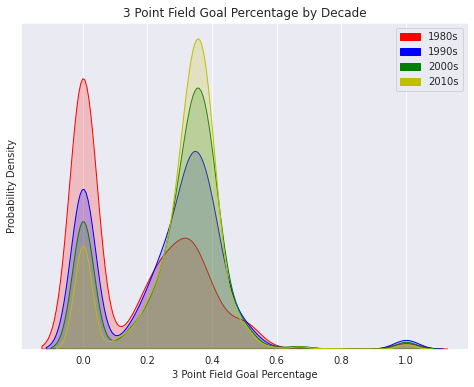

In [ ]:
# Importing library to manually match plots for legend
import matplotlib.patches as mpatches

# Creating a figure
fig5 = plt.figure(figsize=(8,6))

# Setting the style
sns.set_style('darkgrid')

# Adding plots for each decade
sns.kdeplot(eighties_seasons['3P_FG%'], color='r', fill=True, alpha=0.2)
sns.kdeplot(nineties_seasons['3P_FG%'], color='b', fill=True, alpha=0.2)
sns.kdeplot(noughties_seasons['3P_FG%'], color='g', fill=True, alpha=0.2)
sns.kdeplot(teens_seasons['3P_FG%'], color='y', fill=True, alpha=0.2)

# Adding x axis label
plt.xlabel('3 Point Field Goal Percentage')

# Adding y axis label and removing yticks
plt.ylabel('Probability Density')
plt.yticks([])

# Adding a title
plt.title('3 Point Field Goal Percentage by Decade')

# Adding a legend
red_patch = mpatches.Patch(color='r', label='1980s')
blue_patch = mpatches.Patch(color='b', label='1990s')
green_patch = mpatches.Patch(color='g', label='2000s')
yellow_patch = mpatches.Patch(color='y', label='2010s')
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch])
plt.show()

Clearly there is a trend towards higher 3 point field goal percentage over time. 

We can also view this as a [Cumulative Distribution Function (CDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function), plotted below. 

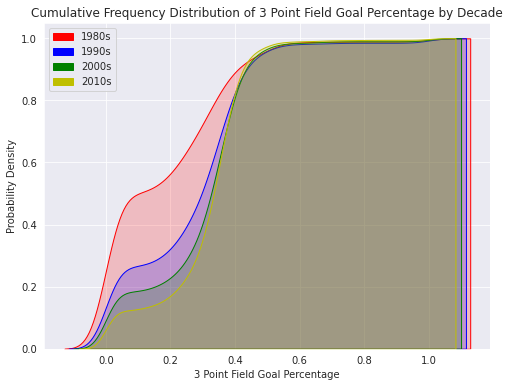

In [ ]:
# Creating a figure
fig6 = plt.figure(figsize=(8,6))

# Adding plots for each decade
sns.kdeplot(eighties_seasons['3P_FG%'], color='r', fill=True, alpha=0.2, cumulative=True)
sns.kdeplot(nineties_seasons['3P_FG%'], color='b', fill=True, alpha=0.2, cumulative=True)
sns.kdeplot(noughties_seasons['3P_FG%'], color='g', fill=True, alpha=0.2, cumulative=True)
sns.kdeplot(teens_seasons['3P_FG%'], color='y', fill=True, alpha=0.2, cumulative=True)

# Adding x axis label
plt.xlabel('3 Point Field Goal Percentage')

# Adding y axis label
plt.ylabel('Probability Density')

# Adding a title
plt.title('Cumulative Frequency Distribution of 3 Point Field Goal Percentage by Decade')

# Adding a legend
red_patch = mpatches.Patch(color='r', label='1980s')
blue_patch = mpatches.Patch(color='b', label='1990s')
green_patch = mpatches.Patch(color='g', label='2000s')
yellow_patch = mpatches.Patch(color='y', label='2010s')
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch], loc='upper left')
plt.show()

Now let's test the hypothesis, that there is a significant increase in 3 point shooting ability between decades of NBA players. 

As these are samples of the total NBA player population we will use random sampling to select a subset from each decade and then simulate

In [ ]:
# Calculating the Kurskal-Wallis test
kruskal = stats.kruskal(eighties_seasons['3P_FG%'], nineties_seasons['3P_FG%'], 
                        noughties_seasons['3P_FG%'], teens_seasons['3P_FG%'], nan_policy='omit')
print('Test Statistic is {:.2f}, Alpha is {:.2f}'.format(kruskal[0], kruskal[1]))

Test Statistic is 839.19, Alpha is 0.00


The output shows significant difference exists for 3 point shooting ability between NBA players in different decades. There are likely lots of factors at play here such as players taking less 3 point field goal attempts in the 1980s and 1990s, which could be indicative of this shot being less of a priority and perhaps less practiced by NBA players. 

There are also some key limitations to the test which should prevent us from drawing any real conclusions, specifically:

- There will be players present in multiple decades (i.e. LeBron James would be in the 2000s and 2010s datasets), which violates of one the Kruskal-Wallis test's assumptions that samples are independent.
- We haven't looked at the number of samples in each decade, as we should factor this in prior to analysis

Approaches to reduce error therefore would be:

- Remove players who are present in multiple decades, using pre-defined criteria
- Either remove players at random from each decades until all datasets are the same size, or simulate random sampling from each decade and completion of Kruskall Wallis tests, then viewing the distribution of the results


# Next Steps

Throughout this notebook additional steps were identified to improve the validity of the statistical tests conducted. Therefore this notebook will be updated over time to reflect these. 

As there are lots of other opportunities for this data, further statistical analyses and/or building of machine learning models will be conducted in additional notebooks for the following use cases or questions:

Given there are 5 positions, how many clusters of player 'types' can we identify?

Building a model to predict how many points a player score next season? This will also answer secondary questions around what are the best features (independent variables) to use in the model, and how many features will give the best accuracy? 

At what age do NBA players peak in terms of scoring, assists, rebounds or steals? And has this age changed over time, i.e. are players in the 2010s peaking earlier or later than those from other decades?

Are more players being traded than in earlier years? 

Is there a trend towards rosters having a higher proportion of certain positions or skills? 

What is the probability that a player will score more points in a season than [Wilt Chamberlain's 1961-62 record](https://en.wikipedia.org/wiki/List_of_National_Basketball_Association_annual_scoring_leaders) or Michael Jordan's 3,041 points in 1986-87?